In [1]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
from math import pow

In [2]:
def interpolate(x_values, y_values, x):
    def basis(j):
        p = [(x - x_values[m])/(x_values[j] - x_values[m]) for m in range(k) if m != j]
        return reduce(lambda x, y : x * y, p)
    k = len(x_values)
    return sum(basis(j) * y_values[j] for j in range(k))

In [3]:
tt = [0, 100, 200, 400, 600, 800, 1000, 1200]
Prr = [0.707, 0.688, 0.680, 0.678, 0.699, 0.713, 0.719, 0.724]
nunu =  [1e-6 * x for x in [13.28, 23.13, 34.85, 63.09, 96.89, 134.8, 177.1, 233.7]]
lmdlmd = [1e-2 * x for x in [2.44, 3.21, 3.93, 5.21, 6.22, 7.18, 8.07, 9.15]]

In [4]:
t_c = 756
t_g = 118

print('Значение теплофизических свойств при температуре:', t_c)
print('Pr(tc) = %.3f' % interpolate(tt, Prr, t_c))
print('nu(tc) = %.3e' % (interpolate(tt, nunu, t_c)))
print('lmd(tc) = %.3f' % interpolate(tt, lmdlmd, t_c))

print('\nЗначение теплофизических свойств при температуре:', t_g)
print('Pr(tg) = %.3f' % interpolate(tt, Prr, t_g))
print('nu(tg) = %.3e' % interpolate(tt, nunu, t_g))
print('lmd(tg) = %.3f' % interpolate(tt, lmdlmd, t_g))

Значение теплофизических свойств при температуре: 756
Pr(tc) = 0.712
nu(tc) = 1.262e-04
lmd(tc) = 0.070

Значение теплофизических свойств при температуре: 118
Pr(tg) = 0.686
nu(tg) = 2.511e-05
lmd(tg) = 0.033


** Функция коэффициента теплоотдачи: **

In [5]:
beta = 1/273
gg = 9.81
Gr = lambda tc, tg, d : gg * beta * (tc - tg) * (d ** 3)/interpolate(tt, nunu, tg)

Nu = lambda tc, tg, d : 0.5 * pow(Gr(tc, tg, d) * interpolate(tt, Prr, tg), 0.25) * pow(
    interpolate(tt, Prr, tg)/interpolate(tt, Prr, tc), 0.25)

alpha = lambda tc, tg, d : Nu(tc, tg, d) * interpolate(tt, lmdlmd, tg)/d

Зависимость коэффициента теплоотдачи от температуры стенки при диаметре цилиндра 100 и 10 мм.


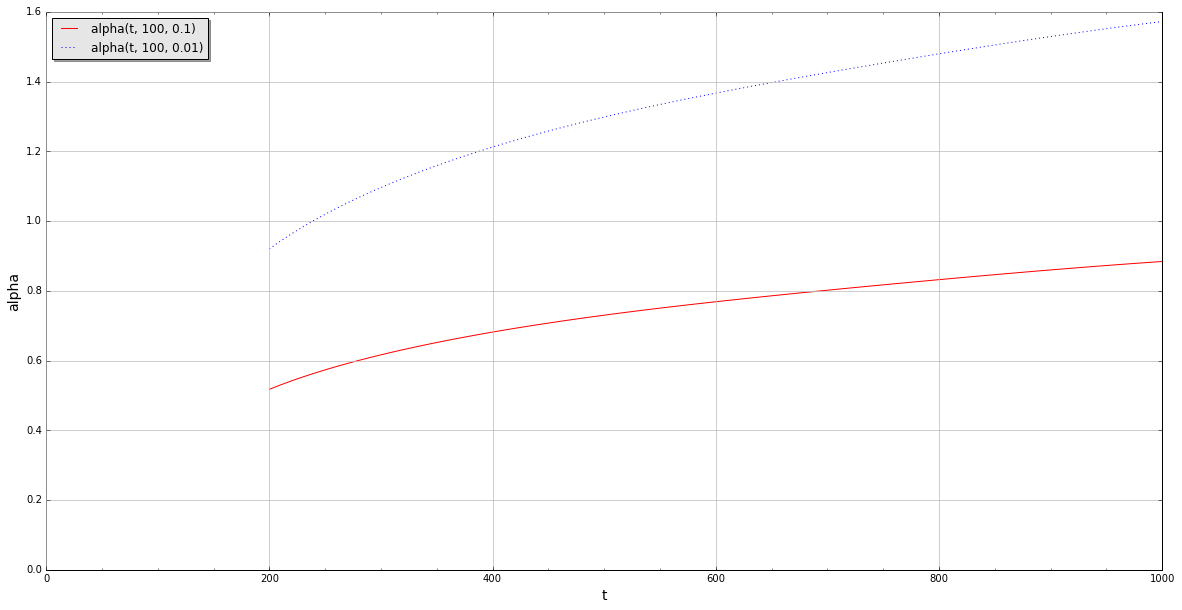



Зависимость коэффициента теплоотдачи от диаметра цилиндра при температуре стенки 450 и 850 градусов.


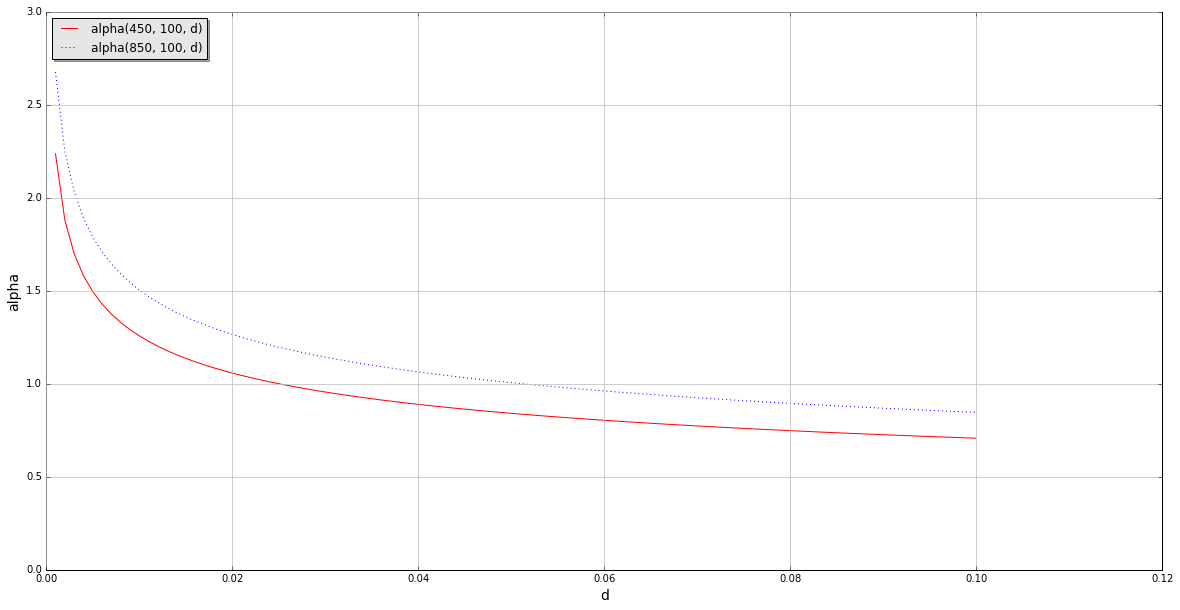

In [6]:
print('Зависимость коэффициента теплоотдачи от температуры стенки при диаметре цилиндра 100 и 10 мм.')

fig, ax = plt.subplots(figsize=(20,10))

h = 10

xs = np.arange(200, 1000 + h, h)
ys = [alpha(x, 100, 0.1) for x in xs]
ax.plot(xs, ys, '-r',label = 'alpha(t, 100, 0.1)')

ys = [alpha(x, 100, 0.01) for x in xs]
ax.plot(xs, ys, ':b',label = 'alpha(t, 100, 0.01)')

plt.xlabel('t', fontsize = 14)
plt.ylabel('alpha', fontsize = 14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper left', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

print('\n\nЗависимость коэффициента теплоотдачи от диаметра цилиндра при температуре стенки 450 и 850 градусов.')

fig, ax = plt.subplots(figsize=(20,10))

h = 0.001

xs = np.arange(1e-3, 0.1 + h, h)
ys = [alpha(450, 100, x) for x in xs]
ax.plot(xs, ys, '-r',label = 'alpha(450, 100, d)')

ys = [alpha(850, 100, x) for x in xs]
ax.plot(xs, ys, ':b',label = 'alpha(850, 100, d)')

plt.xlabel('d', fontsize = 14)
plt.ylabel('alpha', fontsize = 14)
ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))
ax.axhline(y = 0, color='black')
ax.axvline(x = 0, color='black')
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
legend = ax.legend(loc = 'upper left', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()